# Importing of libraries and datasets

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

In [6]:
#Importing dataset
HDB_df=pd.read_csv('/kaggle/input/hdb-df2/HDB_df.csv')

In [3]:
#Viewing dataset
print(HDB_df.shape)
HDB_df.head()

(149805, 57)


,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,resale_price,Tranc_Year,Tranc_Month,...,mrt_name,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,sec_sch_name
0,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,90.0,Model A,2006,680000.0,2016,5,...,Kallang,0,0,29.427395,1138.633422,Geylang Methodist School,78,1,1138.633422,Geylang Methodist School
1,BISHAN,5 ROOM,153,BISHAN ST 13,130.0,Improved,1987,665000.0,2012,7,...,Bishan,1,1,58.207761,415.607357,Kuo Chuan Presbyterian Primary School,45,1,447.894399,Kuo Chuan Presbyterian Secondary School
2,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,144.0,Apartment,1997,838000.0,2013,7,...,Bukit Batok,1,0,214.747860,498.849039,Keming Primary School,39,0,180.074558,Yusof Ishak Secondary School
3,BISHAN,4 ROOM,232,BISHAN ST 22,103.0,Model A,1992,550000.0,2012,4,...,Bishan,1,1,43.396521,389.515528,Catholic High School,20,1,389.515528,Catholic High School
4,YISHUN,4 ROOM,876,YISHUN ST 81,83.0,Simplified,1987,298000.0,2017,12,...,Khatib,0,0,129.422752,401.200584,Naval Base Primary School,74,0,312.025435,Orchid Park Secondary School


# Modeling

## Train, test, split of initial data

In [32]:
#Assinging features and response variables
X=HDB_df.drop(columns='resale_price')
y=HDB_df['resale_price']

In [37]:
#Train,test,split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

## Preprocessing

### StandardScaling

In [38]:
#Dissecting features with numeric values
X_train_num=X_train.select_dtypes(exclude='object')
X_test_num=X_test.select_dtypes(exclude='object')

In [39]:
#StandardScaling the numeric values of the features
SS=StandardScaler()

X_train_SS=SS.fit_transform(X_train_num)
X_test_SS=SS.transform(X_test_num)

In [40]:
#Create new dataframe on both train and test data after scaling the numeric values
X_train_SS_df=pd.DataFrame(X_train_SS, columns=X_train_num.columns)
X_test_SS_df=pd.DataFrame(X_test_SS, columns=X_test_num.columns) 

### One hot encoding

In [41]:
#Dissecting categorial features
X_train_cat=X_train.select_dtypes(include='object')
X_test_cat=X_test.select_dtypes(include='object')

In [42]:
#Creating dummy variables for categorical columns

#Instantiating one hot encoding
OHE=OneHotEncoder(handle_unknown='ignore', drop='first')

#Fit and transform of the train dataset
X_train_cat_arr=OHE.fit_transform(X_train_cat).toarray()
X_test_cat_arr=OHE.transform(X_test_cat).toarray()

#Transforming back to a dataframe
X_train_cat_df=pd.DataFrame(X_train_cat_arr, columns=OHE.get_feature_names_out(X_train_cat.columns)) 
X_test_cat_df=pd.DataFrame(X_test_cat_arr, columns=OHE.get_feature_names_out(X_test_cat.columns))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


In [43]:
#View of dummify categorical features
print(X_train_cat_df.shape)
X_train_cat_df.head()

(112353, 3469)


,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,...,sec_sch_name_Xinmin Secondary School,sec_sch_name_Yio Chu Kang Secondary School,sec_sch_name_Yishun Secondary School,sec_sch_name_Yishun Town Secondary School,sec_sch_name_Yuan Ching Secondary School,sec_sch_name_Yuhua Secondary School,sec_sch_name_Yusof Ishak Secondary School,sec_sch_name_Yuying Secondary School,sec_sch_name_Zhenghua Secondary School,sec_sch_name_Zhonghua Secondary School
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#Merging the qualitative and quantitative features together on index
Xtrain_pro_df=pd.merge(X_train_SS_df, X_train_cat_df,left_index=True, right_index=True) #Merged train data
Xtest_pro_df=pd.merge(X_test_SS_df, X_test_cat_df, left_index=True, right_index=True) #Merged test data

In [13]:
print(f'The data use for first round of training has {Xtrain_pro_df.shape[0]} rows and {Xtrain_pro_df.shape[1]} features')

The data use for first round of training has 112353 rows and 3512 features


## Linear regression

In [14]:
#Instantiate
lr_base=LinearRegression()

In [15]:
#Fitting the train data
lr_base.fit(Xtrain_pro_df,y_train)

LinearRegression()

### Model evaluation

In [16]:
#Evaluating model with R2 score using train and test data 
print(f'The linear regression have a train score of {lr_base.score(Xtrain_pro_df,y_train)}')
print(f'The linear regression have a test score of {lr_base.score(Xtest_pro_df,y_test)}')
#Calculating RMSE
y_pred=lr_base.predict(Xtest_pro_df)
rmse_lr_base=np.sqrt(mean_squared_error(y_test,y_pred))
print(f'The RMSE is {rmse_lr_base}')

The linear regression have a train score of 0.9358733908636219
The linear regression have a test score of 0.9313177554983305
The RMSE is 37517.28063030179


In [17]:
#Constructing cross val score
print(f'The cross validation score of the linear regression is {cross_val_score(lr_base,Xtrain_pro_df,y_train,cv=5).mean()}')

The cross validation score of the linear regression is -4.478824558593459e+16


Conclusion: Despite a healthy train score, however with cross validation of k-folds=5, the score is terrible. The significantly lower train score as compared to test score could also implies overfitting in the model.

Folow-up: Thus, we will be using Regularization (both Ridge and Lasso) to balance the coefficient power of less relevant parameters to reduce overfitting. 

## RidgeCV regression

Using ridge regression, with cross validation, to reduce the coefficient of less relevant parameters.

K-folds of 5 is selected for now and might be adjusted if need arises.

In [45]:
#Training the ridgeCV regression model with model's own search of alphas
ridge_CV=RidgeCV(cv=5,scoring='r2').fit(Xtrain_pro_df,y_train)

### Model evaluation

In [19]:
#Evaluating model with R2 score using train and test data 
print(f'Train score: {ridge_CV.score(Xtrain_pro_df,y_train)}')
print(f'Test score: {ridge_CV.score(Xtest_pro_df,y_test)}')
#Calculating RMSE
y_pred_ridge_CV=ridge_CV.predict(Xtest_pro_df)
rmse_ridge_CV=np.sqrt(mean_squared_error(y_test,y_pred_ridge_CV))
print(f'The RMSE is {rmse_ridge_CV}')

Train score: 0.935682367263885
Test score: 0.9313648672434631
The RMSE is 37504.41116324024


Conclusion: The test and train score are both in healthy range and there is not much of a difference between the 2 scores, implying that there are no overfitting or underfitting issues with this model. 

Follow-up: To understand significant and insignificant features in influencing resale price by looking at the coefficients

In [47]:
#Creating a dataframe of the coefficient values to their respective features
ridgeCV_df=pd.DataFrame({'features': Xtrain_pro_df.columns, 'coef_val': ridge_CV.coef_, 'abs_coef_val':np.abs(ridge_CV.coef_)})
ridgeCV_df.set_index('features', inplace=True)

In [48]:
#Display the most significant features
ridgeCV_df.sort_values(by='abs_coef_val', ascending=False).head(10)

,coef_val,abs_coef_val
features,,
flat_model_Terrace,358354.296988,358354.296988
street_name_KIM CHENG ST,176086.338045,176086.338045
block_12C,-174161.385243,174161.385243
street_name_ANG MO KIO AVE 2,161368.058811,161368.058811
block_12B,-161149.881140,161149.881140
street_name_LIM LIAK ST,158793.940295,158793.940295
street_name_MOH GUAN TER,156770.097880,156770.097880
street_name_SENG POH RD,151481.727639,151481.727639
street_name_KIM PONG RD,148617.440814,148617.440814


In [22]:
#Display the least significant features
ridgeCV_df.sort_values(by='abs_coef_val', ascending=True).head(10)

,coef_val,abs_coef_val
features,,
other_room_rental,-4.370299,4.370299
block_92,-5.663689,5.663689
block_210,-14.951678,14.951678
block_590A,-17.307705,17.307705
block_937,-25.127128,25.127128
multigen_sold,37.481073,37.481073
block_252,-51.287930,51.287930
sec_sch_name_Evergreen Secondary School,55.452717,55.452717
block_715,-55.980285,55.980285


Conclusion:
- Majority of the most and least significant features are of "block" or "street_name". The feature, "block" which on its own might not be meaningful since the block numbers are not unique across Singapore. We can consider to drop block numbers to see if it improves the model performance.

Follow-up: 

- **Do hypothesis testing to test for significance** 

- **Continue with LassoCV.** The least significant features are taken note of and interpret with LassoCV regression to see if the results converge. If so, these features will go through hypothesis testing to test for its significance before dropping.

## LassoCV regression

Using lassoCV regression with k-folds=5 for now to zero out the irrelevant coefficients

In [23]:
#Training the lassoCV regression model
lasso_CV=LassoCV(n_alphas=100, max_iter=50000, cv=5).fit(Xtrain_pro_df, y_train)

### Model Evaluation

In [24]:
#Evaluating model with R2 score using train and test data 
print(f'Train score: {lasso_CV.score(Xtrain_pro_df,y_train)}')
print(f'Test score: {lasso_CV.score(Xtest_pro_df,y_test)}')
#Calculating RMSE
y_pred_lasso_CV=lasso_CV.predict(Xtest_pro_df)
rmse_lasso_CV=np.sqrt(mean_squared_error(y_test,y_pred_lasso_CV))
print(f'The RMSE is {rmse_lasso_CV}')

Train score: 0.9001645214010258
Test score: 0.8986845558821959
The RMSE is 45566.632945831094


Conclusion: Despite a poorer R2 score for both train and test data as compared to the Ridge regression's scores, the test and train score are both in healthy range and there is not much of a difference between the 2 scores, implying that there are no overfitting or underfitting issues with this model. 

Follow-up: To understand significant and insignificant features in influencing resale price by looking at the coefficients.

In [25]:
#Creating a dataframe of the coefficient values to their respective features
lassoCV_df=pd.DataFrame({'features': Xtrain_pro_df.columns, 'coef_val': lasso_CV.coef_, 'abs_coef_val':np.abs(lasso_CV.coef_)})
lassoCV_df.set_index('features', inplace=True)

In [26]:
#Display the most significant features
lassoCV_df.sort_values(by='abs_coef_val', ascending=False).head(10)

,coef_val,abs_coef_val
features,,
flat_model_Terrace,234216.789955,234216.789955
town_BUKIT TIMAH,141236.449826,141236.449826
town_MARINE PARADE,116707.861055,116707.861055
floor_area_sqm,96129.882795,96129.882795
town_BISHAN,80811.753304,80811.753304
flat_model_DBSS,77545.106560,77545.106560
town_SERANGOON,52670.576958,52670.576958
Latitude,-44259.176436,44259.176436
town_BEDOK,-43405.850107,43405.850107


In [27]:
#Display the least significant features
lassoCV_df.sort_values(by='abs_coef_val', ascending=True).head(10)

,coef_val,abs_coef_val
features,,
block_634,-0.0,0.0
block_851,0.0,0.0
block_852,0.0,0.0
block_853,0.0,0.0
block_854,0.0,0.0
block_855,0.0,0.0
block_856,0.0,0.0
block_856B,0.0,0.0
block_856C,0.0,0.0


Conclusion: 
- The top significant features for LassoCV regression are dominated by the feature, "town", unlike "street_name" features under RidgeCV regression. 
- The least significant features for LassoCV regression are dominated by the feature, "block", similar to RidgeCV regression
- The top significant feature is under "flat_model" being "Terrace" for both of the regularizationCV models

Follow-up:
- **Hypothesis testing to test if "block" feature have significance on resale price**
- **Hypothesis testing whether "town" and "street_name" will have significance on resale price**

# Improvement 01: Dropping of certain geographical features

Approach:
- Test for the feature's individual significance with t-test
- Test for the feature's overall significance with F-test
- Conclude results
    - **Poor results for both**: drop feature
    - **Good F but poor t**: suggest multicollinearity, drop and evaluate model performance
    - **Good t but poor f**: keep feature to evaluate
    - **Good results for both**: keep feature

## Testing for individual significance of features

In [28]:
#To construct OLS regression and compare the test statistic in its summary
Xtrain_pro_OLS=sm.add_constant(Xtrain_pro_df)

In [29]:
#Formatting y_train to fit for statsmodel OLS 
y_train_OLS=y_train.values.reshape(-1,1)
OLS_sm=sm.OLS(y_train_OLS,Xtrain_pro_OLS).fit()

In [30]:
#Overall summary of the regression using OLS
OLS_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     472.0
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:18:46   Log-Likelihood:            -1.3390e+06
No. Observations:              112353   AIC:                         2.685e+06
Df Residuals:                  108982   BIC:                         2.717e+06
Df Model:                        3370                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                    4.418e+05   1.42e+04     31.125      0.000    4.14e+05     4.7e+05
floor_area_sqm                                           7.451e+04    714.547    104.279      0.000    7.31e+04    7.59e+04
lease_commence_year                                      1.584e+04    665.178     23.811      0.000    1.45e+04    1.71e+04
Tranc_Year                                              -1.952e+04    125.481   -155.593      0.000   -1.98e+04   -1.93e+04
Tranc_Month                                             -2798.2386    114.122    -24.520      0.000   -3021.915   -2574.562
mid_storey                                               6310.4973     45.038    140.116      0.000    6222.224    6398.771
lb_storey                                                3.524e+04   1761.443     20.004      0.000    3.18e+04    3.87e+04
ub_storey                                               -2.266e+04   1760.693    -12.871      0.000   -2.61e+04   -1.92e+04
hdb_age                                                 -1.584e+04    665.178    -23.811      0.000   -1.71e+04   -1.45e+04
max_floor_lvl                                            1.227e+04    370.686     33.100      0.000    1.15e+04     1.3e+04
year_completed                                           2.261e+04   1418.226     15.940      0.000    1.98e+04    2.54e+04
total_dwelling_units                                    -4854.0221    195.704    -24.803      0.000   -5237.598   -4470.446
1room_sold                                               1066.0035    183.354      5.814      0.000     706.632    1425.375
2room_sold                                              -1689.3027    221.221     -7.636      0.000   -2122.894   -1255.712
3room_sold                                              -2669.1236    178.141    -14.983      0.000   -3018.278   -2319.970
4room_sold                                               -661.6545    186.889     -3.540      0.000   -1027.955    -295.355
5room_sold                                               -665.7369    266.080     -2.502      0.012   -1187.249    -144.225
exec_sold                                               -2648.5625    348.067     -7.609      0.000   -3330.768   -1966.357
multigen_sold                                            -144.2433    307.902     -0.468      0.639    -747.727     459.240
studio_apartment_sold                                     649.5626    248.805      2.611      0.009     161.909    1137.217
1room_rental                                              540.3272    141.757      3.812      0.000     262.485     818.170
2room_rental                                             1074.8094    168.045      6.396      0.000     745

### Functions created for hypothesis testing and presentation of results

In [31]:
#Creating a function to create dataframe of the OLS summary with desired feature for easier viewing
def OLSsummary(feature):
    coef_table = pd.DataFrame(OLS_sm.summary().tables[1].data[1:], columns=OLS_sm.summary().tables[1].data[0])
    coef_table = coef_table[coef_table[''].str.startswith(feature)]
    coef_table[['coef', 'std err', 't', 'P>|t|']] = coef_table[['coef', 'std err', 't', 'P>|t|']].astype(float)
    coef_table = coef_table.reset_index(drop=True)
    coef_table.rename(columns={'':'feat_name'}, inplace=True)
    return coef_table

In [32]:
#Creating a function to calculate proportion of insignificant features among its category and the category among all features in the model
def prop_feat(feature):
    #Filtering features that have no individual significance in predicting resale price, with 95% confidence level
    df_insig=OLSsummary(feature)[OLSsummary(feature)['P>|t|']>=0.05]

    #Calculating proportion of features are made up of "block" features
    feat_columns = Xtrain_pro_df.filter(regex='^'+feature)
    print(f'There are {feat_columns.shape[1]} "{feature}" dummy variable features')
    
    #Calculating proportion of "block" features that are not significant
    print(f'Proportion of insignificant "{feature}" features is {len(df_insig)/len(OLSsummary(feature))}')
    
    #Calculating the mean of the absolute of coefficient of the feature
    mean=np.abs(OLSsummary(feature)['coef']).mean()
    median=np.abs(OLSsummary(feature)['coef']).median()
    print(f'The mean of the absolute coefficient of the "{feature}" feature is {mean} and its median is {median}')
    



### Testing for individual significance on "block" feature

$$
\begin{eqnarray*}
&H_0:& \beta_{block} = 0 \\
&H_A:& \beta_{block} \neq 0
\end{eqnarray*}
$$

The test will be conducted assuming $\alpha=0.05$ and under the assumption that the errors under linear regression are normally distributed.

In [33]:
#First 5 rows of "block" summary
OLSsummary('block').head()

,feat_name,coef,std err,t,P>|t|,[0.025,0.975]
0,block_10,-12560.000,3712.478,-3.384,0.001,-1.98e+04,-5287.114
1,block_100,-18810.000,5969.601,-3.151,0.002,-3.05e+04,-7111.732
2,block_101,-12480.000,3879.700,-3.216,0.001,-2.01e+04,-4873.499
3,block_101A,-6080.839,9856.327,-0.617,0.537,-2.54e+04,1.32e+04
4,block_101B,11880.000,9588.431,1.239,0.216,-6917.129,3.07e+04


In [34]:
prop_feat('block')

There are 2436 "block" dummy variable features
Proportion of insignificant "block" features is 0.49014778325123154
The mean of the absolute coefficient of the "block" feature is 22565.508383292283 and its median is 18100.0


### Testing for individual significance on "town" feature

$$
\begin{eqnarray*}
&H_0:& \beta_{town} = 0 \\
&H_A:& \beta_{town} \neq 0
\end{eqnarray*}
$$

The test will be conducted assuming $\alpha=0.05$ and under the assumption that the errors under linear regression are normally distributed.

In [35]:
#First 5 rows of "town" summary
OLSsummary('town').head()

,feat_name,coef,std err,t,P>|t|,[0.025,0.975]
0,town_BEDOK,-42250.0,8450.435,-5.000,0.000,-5.88e+04,-2.57e+04
1,town_BISHAN,59670.0,4360.256,13.685,0.000,5.11e+04,6.82e+04
2,town_BUKIT BATOK,-27930.0,10300.000,-2.698,0.007,-4.82e+04,-7642.424
3,town_BUKIT MERAH,66780.0,7028.553,9.502,0.000,5.3e+04,8.06e+04
4,town_BUKIT PANJANG,-23430.0,4144.426,-5.652,0.000,-3.15e+04,-1.53e+04


In [36]:
#Calling the function to understand the feature's significance
prop_feat('town')

There are 25 "town" dummy variable features
Proportion of insignificant "town" features is 0.12
The mean of the absolute coefficient of the "town" feature is 38042.72888 and its median is 28580.0


### Testing for individual significance on "street_name" feature

$$
\begin{eqnarray*}
&H_0:& \beta_{streetname} = 0 \\
&H_A:& \beta_{streetname} \neq 0
\end{eqnarray*}
$$

The test will be conducted assuming $\alpha=0.05$ and under the assumption that the errors under linear regression are normally distributed.

In [37]:
#First 5 rows of "town" summary
OLSsummary('street_name').head()

,feat_name,coef,std err,t,P>|t|,[0.025,0.975]
0,street_name_ADMIRALTY LINK,-5442.9232,7432.765,-0.732,0.464,-2e+04,9125.190
1,street_name_AH HOOD RD,52550.0000,11700.000,4.494,0.000,2.96e+04,7.55e+04
2,street_name_ALJUNIED CRES,13380.0000,7606.899,1.758,0.079,-1534.083,2.83e+04
3,street_name_ALJUNIED RD,-25400.0000,13700.000,-1.851,0.064,-5.23e+04,1491.318
4,street_name_ANCHORVALE CRES,22050.0000,13100.000,1.687,0.092,-3563.327,4.77e+04


In [38]:
#Calling the function to understand the feature's significance
prop_feat('street_name')

There are 546 "street_name" dummy variable features
Proportion of insignificant "street_name" features is 0.3553113553113553
The mean of the absolute coefficient of the "street_name" feature is 31556.33468095238 and its median is 23830.0


### Testing for individual significance on "planning_name" feature

$$
\begin{eqnarray*}
&H_0:& \beta_{planningname} = 0 \\
&H_A:& \beta_{planningname} \neq 0
\end{eqnarray*}
$$

The test will be conducted assuming $\alpha=0.05$ and under the assumption that the errors under linear regression are normally distributed.

In [39]:
#First 5 rows of "planning_area" summary
OLSsummary('planning_area').head()

,feat_name,coef,std err,t,P>|t|,[0.025,0.975]
0,planning_area_Bedok,64750.0,7342.407,8.819,0.000,5.04e+04,7.91e+04
1,planning_area_Bishan,59670.0,4360.256,13.685,0.000,5.11e+04,6.82e+04
2,planning_area_Bukit Batok,15690.0,9286.746,1.690,0.091,-2511.243,3.39e+04
3,planning_area_Bukit Merah,66780.0,7028.553,9.502,0.000,5.3e+04,8.06e+04
4,planning_area_Bukit Panjang,-23430.0,4144.426,-5.652,0.000,-3.15e+04,-1.53e+04


In [40]:
#Calling the function to understand the feature's significance
prop_feat('planning_area')

There are 31 "planning_area" dummy variable features
Proportion of insignificant "planning_area" features is 0.2903225806451613
The mean of the absolute coefficient of the "planning_area" feature is 30796.717822580642 and its median is 24300.0


### Conclusion

|Feature|Observation|Conclusion|
|---|---|---|
|"block"|49% of the dummy features are not significant, mean= 22 565.50, median=18 100|Substantial features are insignificant and distribution of coefficients are right skewed|
|"town"|12% of the dummy features are not significant, mean= 38042.73, median=28 580|Substantial features are significant and distribution of coefficients are right skewed|
|"street_name"|35% of the dummy features are not significant, mean= 31556.33, median=23 830|Majority features are significant and distribution of coefficients are right skewed|
|"planning_area"|29% of the dummy features are not significant, mean= 30796.72, median=24 300|Majority features are significant and distribution of coefficients are right skewed|

These features are use to capture geographical location of the resale flat. 
- "block" features display highest proportion of  insignificant features. 
- "town" has the highest proportion of significant features as compared to others but "street_name" is able to capture a more precised location and inclusive of "town" features thus these features are preserved. However for "planning_area", it is decided to be drop as it has very similar catch of information to "town" and hold less significance than "town".

## Test for overall significance of features

In [41]:
#Concatenate train data of X and y together for ANOVA test
anova_train_df=pd.concat([X_train, y_train],axis=1)

### Testing for overall significance on "block", "town", "street_name", "planning_area" features

In [42]:
# create OLS model and calculate ANOVA table
model_test = ols('resale_price ~ block + town + street_name + planning_area', data=anova_train_df).fit()
anova_table = sm.stats.anova_lm(model_test, typ=2)

# print ANOVA table
print(anova_table)

                     sum_sq        df           F  PR(>F)
block          3.151273e+14    2436.0   14.631917     0.0
town           5.757539e+13      25.0  260.489001     0.0
street_name    1.178595e+15     546.0  244.154401     0.0
planning_area  6.711856e+13      31.0  244.891363     0.0
Residual       9.670510e+14  109381.0         NaN     NaN


### Conclusion

|Feature|Observation|Conclusion|
|---|---|---| 
|"block"|pvalue = 0.00|less than 0.05, overall significant feature|
|"town"|pvalue = 0.00|less than 0.05, overall significant feature|
|"street_name"|pvalue = 0.00|less than 0.05, overall significant feature|
|"planning_area"|pvalue = 0.00|less than 0.05, overall significant feature|

- The selected features display overall significance in predicting resale prices but for "block" feature especially have shown relatively poor individual significance in predicting resale prices. This suggest multicollinearity among the "block" feature and other features. 
- "block" feature will be drop for next round of modelling and will re-evaluate the model performance.

## Dropping of "block" and "planning_area" features

In [43]:
#Dropping "block" features in dataframe
X_train_cat_01=X_train_cat.drop(columns=['block','planning_area'])
X_test_cat_01=X_test_cat.drop(columns=['block','planning_area'])

In [44]:
#Creating dummy variables for categorical columns

#Instantiating one hot encoding
OHE01=OneHotEncoder(handle_unknown='ignore', drop='first')

#Fit and transform of the train dataset
X_train_cat_arr_01=OHE01.fit_transform(X_train_cat_01).toarray()
X_test_cat_arr_01=OHE01.transform(X_test_cat_01).toarray()

#Transforming back to a dataframe
X_train_cat_df01=pd.DataFrame(X_train_cat_arr_01, columns=OHE01.get_feature_names_out(X_train_cat_01.columns))
X_test_cat_df01=pd.DataFrame(X_test_cat_arr_01, columns=OHE01.get_feature_names_out(X_test_cat_01.columns))

In [45]:
#Merging the qualitative and quantitative features together on index
Xtrain_pro_df01=pd.merge(X_train_SS_df, X_train_cat_df01,left_index=True, right_index=True) #Merged train data
Xtest_pro_df01=pd.merge(X_test_SS_df, X_test_cat_df01, left_index=True, right_index=True) #Merged test data

### RidgeCV (dropped features: "block" & "planning_area")

In [46]:
#Training the ridgeCV regression model
ridge_CV01=RidgeCV(cv=5,scoring='r2').fit(Xtrain_pro_df01,y_train)

In [47]:
#Evaluating model with R2 score using train and test data 
print(f'Train score: {ridge_CV01.score(Xtrain_pro_df01,y_train)}')
print(f'Test score: {ridge_CV01.score(Xtest_pro_df01,y_test)}')
#Calculating RMSE
y_pred_ridge_CV01=ridge_CV01.predict(Xtest_pro_df01)
rmse_ridge_CV01=np.sqrt(mean_squared_error(y_test,y_pred_ridge_CV01))
print(f'The RMSE is {rmse_ridge_CV01}')

Train score: 0.9274488122200034
Test score: 0.9253659022133148
The RMSE is 39109.09405376874


### LassoCV (dropped features: "block" & "planning_area")

In [48]:
#Training the lassoCV regression model
lasso_CV01=LassoCV(n_alphas=100, max_iter=50000, cv=5).fit(Xtrain_pro_df01, y_train)

In [49]:
#Evaluating model with R2 score using train and test data 
print(f'Train score: {lasso_CV01.score(Xtrain_pro_df01,y_train)}')
print(f'Test score: {lasso_CV01.score(Xtest_pro_df01,y_test)}')
#Calculating RMSE
y_pred_lasso_CV01=lasso_CV01.predict(Xtest_pro_df01)
rmse_lasso_CV01=np.sqrt(mean_squared_error(y_test,y_pred_lasso_CV01))
print(f'The RMSE is {rmse_lasso_CV01}')

Train score: 0.9000685805288595
Test score: 0.8986024204936445
The RMSE is 45585.09940429325


Conclusion: 
- Dropping the "block" and "planning_area features despite highly suspected to be highly correlated to other features, in attempt to reduce multicollinearity, does not improve R2 score of the model.
- This could be due to despite the "block" feature being correlated with other features, it also captures certain significant information in predicting resale price such as a more precise location of the resale flat which other features lack.
- As for the "planning_area" feature, it could be dropped on its own and compare the score to this model to see if there are improvements.

# Improvement 02: Dropping features that displayed high correlation during EDA + feature engineering

Approach:
- To drop highly correlated columns: "mid_storey", "lb_storey", "ub_storey", "lease_commence_year", "year_completed"
- To create a feature that takes the average amount of malls and hawker within 2km from the counts of mall and hawker of 3 different ranges in attempt to reduce the amount of features being collinear without losing the significance of the information on predicting resale price.
- Model with ridgeCV and lassoCV and evaluate model performance

In [50]:
#Importing sorted correlation matrix
corr_sorted=pd.read_csv('/kaggle/input/corr-stack/corr_stack_sorted.csv')
corr_sorted

,feature01,feature02,corr_coef,abs_corr_coef
0,mid_storey,lb_storey,0.999414,0.999414
1,mid_storey,ub_storey,0.999412,0.999412
2,lb_storey,ub_storey,0.997654,0.997654
3,lease_commence_year,year_completed,0.988677,0.988677
4,Hawker_Within_1km,Hawker_Within_2km,0.830123,0.830123
5,Hawker_Within_500m,Hawker_Within_1km,0.756713,0.756713
6,total_dwelling_units,3room_sold,0.678721,0.678721
7,floor_area_sqm,resale_price,0.656776,0.656776
8,Hawker_Within_500m,Hawker_Within_2km,0.639865,0.639865
9,lb_storey,max_floor_lvl,0.553970,0.553970


Shown above is the correlation matrix sorted based on highest correlated features which will be dropped in attempt to reduce likelihood of multicollinearity.

In [7]:
#Keeping new set of features as predictors
X_02=HDB_df.drop(columns=['resale_price', 'mid_storey','lb_storey','ub_storey','lease_commence_year','year_completed'])
y=HDB_df['resale_price']

In [8]:
#Feature engineering 2 features that capture the mean of malls & hawkers in the proximity of 2km
X_02['mean_malls_2km'] = X_02[['Mall_Within_500m', 'Mall_Within_1km','Mall_Within_2km']].mean(axis=1)
X_02['mean_hawker_2km'] = X_02[['Hawker_Within_500m', 'Hawker_Within_1km','Hawker_Within_2km']].mean(axis=1)

In [9]:
#Dropping proximity of malls & hawker features
X_02.drop(columns=['Mall_Within_500m', 'Mall_Within_1km','Mall_Within_2km','Hawker_Within_500m', 'Hawker_Within_1km','Hawker_Within_2km'], inplace=True)

In [10]:
#New set of features after dropping highly correlated features and constructing of new features
X_02.columns

Index(['town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'Tranc_Year', 'Tranc_Month', 'hdb_age', 'max_floor_lvl',
       'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'Latitude', 'Longitude', 'planning_area',
       'Mall_Nearest_Distance', 'Hawker_Nearest_Distance',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'mrt_name', 'bus_interchange', 'mrt_interchange',
       'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'pri_sch_name',
       'vacancy', 'pri_sch_affiliation', 'sec_sch_nearest_dist',
       'sec_sch_name', 'mean_malls_2km', 'mean_hawker_2km'],
      dtype='object')

With the new features, it goes through the same steps of preprocessing to impost StandardScaling to numeric features and OneHotEncode on the categorical features.

## Train, test, split with new set of features

In [11]:
#Train,test,split
X_train02,X_test02,y_train,y_test=train_test_split(X_02,y,random_state=1)

## Preprocessing

### StandardScaling

In [12]:
#Dissecting features with numeric values
X_train_num02=X_train02.select_dtypes(exclude='object')
X_test_num02=X_test02.select_dtypes(exclude='object')

In [13]:
#StandardScaling the numeric values of the features
SS02=StandardScaler()

X_train_SS02=SS02.fit_transform(X_train_num02)
X_test_SS02=SS02.transform(X_test_num02)

In [14]:
#Create new dataframe on both train and test data after scaling the numeric values
X_train_SS_df02=pd.DataFrame(X_train_SS02, columns=X_train_num02.columns)
X_test_SS_df02=pd.DataFrame(X_test_SS02, columns=X_test_num02.columns) 

### One hot encoding

In [15]:
#Dissecting categorial features
X_train_cat02=X_train02.select_dtypes(include='object')
X_test_cat02=X_test02.select_dtypes(include='object')

In [16]:
#Creating dummy variables for categorical columns

#Instantiating one hot encoding
OHE02=OneHotEncoder(handle_unknown='ignore', drop='first')

#Fit and transform of the train dataset
X_train_cat_arr02=OHE02.fit_transform(X_train_cat02).toarray()
X_test_cat_arr02=OHE02.transform(X_test_cat02).toarray()

#Transforming back to a dataframe
X_train_cat_df02=pd.DataFrame(X_train_cat_arr02, columns=OHE02.get_feature_names_out(X_train_cat02.columns)) 
X_test_cat_df02=pd.DataFrame(X_test_cat_arr02, columns=OHE02.get_feature_names_out(X_test_cat02.columns))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


In [17]:
#View of dummify categorical features
print(X_train_cat_df02.shape)
X_train_cat_df02.head()

(112353, 3469)


,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,...,sec_sch_name_Xinmin Secondary School,sec_sch_name_Yio Chu Kang Secondary School,sec_sch_name_Yishun Secondary School,sec_sch_name_Yishun Town Secondary School,sec_sch_name_Yuan Ching Secondary School,sec_sch_name_Yuhua Secondary School,sec_sch_name_Yusof Ishak Secondary School,sec_sch_name_Yuying Secondary School,sec_sch_name_Zhenghua Secondary School,sec_sch_name_Zhonghua Secondary School
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Merging the qualitative and quantitative features together on index
Xtrain_pro_df02=pd.merge(X_train_SS_df02, X_train_cat_df02,left_index=True, right_index=True) #Merged train data
Xtest_pro_df02=pd.merge(X_test_SS_df02, X_test_cat_df02, left_index=True, right_index=True) #Merged test data

After the preprocessing, the new train dataset, Xtrain_pro_df02 and new test dataset, Xtest_pro_df02 will be use to train the linear regression model

## Linear regression

In [19]:
#Instantiate
lr_base02=LinearRegression()

In [20]:
#Fitting the train data
lr_base02.fit(Xtrain_pro_df02,y_train)

LinearRegression()

### Model evaluation

In [21]:
#Evaluating model with R2 score using train and test data 
print(f'The linear regression have a train score of {lr_base02.score(Xtrain_pro_df02,y_train)}')
print(f'The linear regression have a test score of {lr_base02.score(Xtest_pro_df02,y_test)}')
#Calculating RMSE
y_pred_lr_base02=lr_base02.predict(Xtest_pro_df02)
rmse_lr_base02=np.sqrt(mean_squared_error(y_test,y_pred_lr_base02))
print(f'The RMSE is {rmse_lr_base02}')

The linear regression have a train score of 0.9240247959210997
The linear regression have a test score of 0.9190933418733938
The RMSE is 40719.388148074875


In [22]:
#Constructing cross val score
print(f'The cross validation score of the linear regression is {cross_val_score(lr_base02,Xtrain_pro_df02,y_train,cv=5).mean()}')

The cross validation score of the linear regression is -2.674628765698848e+16


In [23]:
#To construct OLS regression and analyse a more detailed summary
Xtrain_pro_OLS02=sm.add_constant(Xtrain_pro_df02)

In [24]:
#Formatting y_train to fit for statsmodel OLS 
y_train_OLS02=y_train.values.reshape(-1,1)
OLS_sm02=sm.OLS(y_train_OLS02,Xtrain_pro_OLS02).fit()

In [25]:
#Overall summary of the regression using OLS
OLS_sm02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     394.2
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:47:51   Log-Likelihood:            -1.3485e+06
No. Observations:              112353   AIC:                         2.704e+06
Df Residuals:                  108989   BIC:                         2.736e+06
Df Model:                        3363                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                     4.33e+05   1.54e+04     28.033      0.000    4.03e+05    4.63e+05
floor_area_sqm                                           7.413e+04    774.604     95.701      0.000    7.26e+04    7.56e+04
Tranc_Year                                              -1.871e+04    128.785   -145.299      0.000    -1.9e+04   -1.85e+04
Tranc_Month                                             -2459.9602    121.989    -20.165      0.000   -2699.057   -2220.864
hdb_age                                                 -5.084e+04    593.264    -85.703      0.000    -5.2e+04   -4.97e+04
max_floor_lvl                                            2.365e+04    387.822     60.973      0.000    2.29e+04    2.44e+04
total_dwelling_units                                    -5119.5520    212.715    -24.068      0.000   -5536.470   -4702.634
1room_sold                                                988.7865    199.303      4.961      0.000     598.155    1379.418
2room_sold                                              -1605.9302    240.748     -6.671      0.000   -2077.792   -1134.068
3room_sold                                              -2707.7592    193.121    -14.021      0.000   -3086.273   -2329.245
4room_sold                                               -546.1974    202.808     -2.693      0.007    -943.698    -148.697
5room_sold                                               -944.3974    289.412     -3.263      0.001   -1511.640    -377.154
exec_sold                                               -3369.3876    378.113     -8.911      0.000   -4110.483   -2628.292
multigen_sold                                             -67.1745    335.025     -0.201      0.841    -723.820     589.471
studio_apartment_sold                                    1324.4731    269.864      4.908      0.000     795.543    1853.403
1room_rental                                              709.4610    154.078      4.605      0.000     407.471    1011.451
2room_rental                                             1137.3122    182.870      6.219      0.000     778.890    1495.735
3room_rental                                              -45.7022    190.033     -0.240      0.810    -418.164     326.760
other_room_rental                                         147.4288    196.623      0.750      0.453    -237.949     532.806
Latitude                                                  724.8136   7193.143      0.101      0.920   -1.34e+04    1.48e+04
Longitude                                                3.458e+04   1.06e+04      3.270      0.001    1.39e+04    5.53e+04
Mall_Nearest_Distance                                   -6271.1501    641.043     -9.783      0.000   -7527

Conclusion:
- R2/Adjusted R2 score is decent but lower than the initial model
- In fact, multicolinearity seems to have increased since the Cond. No. coefficient is greater at 5.00e+17

Follow up:
- Use ridgeCV and lassoCV and evaluate the model

## RidgeCV

In [26]:
#Training the ridgeCV regression model
ridge_CV02=RidgeCV(cv=5,scoring='r2').fit(Xtrain_pro_df02,y_train)

### Model Evaluation

In [27]:
#Evaluating model with R2 score using train and test data 
print(f'Train score: {ridge_CV02.score(Xtrain_pro_df02,y_train)}')
print(f'Test score: {ridge_CV02.score(Xtest_pro_df02,y_test)}')
#Calculating RMSE
y_pred_ridge_CV02=ridge_CV02.predict(Xtest_pro_df02)
rmse_ridge_CV02=np.sqrt(mean_squared_error(y_test,y_pred_ridge_CV02))
print(f'The RMSE is {rmse_ridge_CV02}')

Train score: 0.9238314745566277
Test score: 0.9191743529616665
The RMSE is 40698.997069128585


Conclusion:
- Poorer score than the initial ridgeCV model

## LassoCV

In [28]:
#Training the lassoCV regression model
lasso_CV02=LassoCV(n_alphas=100, max_iter=50000, cv=5).fit(Xtrain_pro_df02, y_train)

### Model Evaluation

In [29]:
#Evaluating model with R2 score using train and test data 
print(f'Train score: {lasso_CV02.score(Xtrain_pro_df02,y_train)}')
print(f'Test score: {lasso_CV02.score(Xtest_pro_df02,y_test)}')
#Calculating RMSE
y_pred_lasso_CV02=lasso_CV02.predict(Xtest_pro_df02)
rmse_lasso_CV02=np.sqrt(mean_squared_error(y_test,y_pred_lasso_CV02))
print(f'The RMSE is {rmse_lasso_CV02}')

Train score: 0.8875885376793878
Test score: 0.8865001719313881
The RMSE is 48228.828631944125


Conclusion:
- Poorer score than initial lassoCV model

# Conclusion/Future works

## Model performance summary

|Model|Description|Performance|Conclusion|
|--|--|--|--|
|lr_base|OLS regression model <ul><li>based on dataset (Xtrain_pro_df)|<ul><li>cross_val train score: -4.4788e+16</li><li>test score: 0.93132</li><li>RMSE: 37517.28</ul>|Overfits, not applicable|
|ridge_CV|Ridge regularization with <ul><li>CV of k-folds=5 </li><li>based on dataset (Xtrain_pro_df)|<ul><li>train score: 0.93568</li><li>test score: 0.93136</li><li>RMSE: 37504.41|Best score out of all models|
|lasso_CV|Lasso regularization with <ul><li>CV of k-folds=5 </li><li>based on dataset (Xtrain_pro_df)|<ul><li>train score: 0.90017</li><li>test score: 0.89868</li><li>RMSE: 45566.63</ul>|Poorer score than ridge_CV|
|ridge_CV01|Ridge regularization with <ul><li>CV of k-folds=5 </li><li>based on dataset (Xtrain_pro_df01)<ul><li> "block" and "planning_area" features removed|<ul><li>train score: 0.92745</li><li>test score: 0.92537</li><li>RMSE: 39094.81|2nd best score out of all models|
|lasso_CV01|Lasso regularization with <ul><li>CV of k-folds=5 </li><li>based on dataset (Xtrain_pro_df01)<ul><li> "block" and "planning_area" features removed|<ul><li>train score: 0.90007</li><li>test score: 0.89860</li><li>RMSE: 45566.63|Poorer score than ridge_CV01|
|lr_base02|OLS regression <ul><li>based on dataset (Xtrain_pro_df02) <ul><li>'block', 'mid_storey','lb_storey', 'ub_storey','lease_commence_year', 'year_completed' features removed|<ul><li>cross_val train score: -2.6746e+16</li><li>test score: 0.93132</li><li>RMSE: 40719.38|Overfits, not ideal for prediction|
|ridge_CV02|Ridge regularization with <ul><li>CV of k-folds=5 </li><li>based on dataset (Xtrain_pro_df02) <ul><li>'block', 'mid_storey','lb_storey', 'ub_storey','lease_commence_year', 'year_completed' features removed|<ul><li>train score: 0.92383</li><li>test score: 0.91917</li><li>RMSE: 40698.99|3rd best score out of all models|
|lasso_CV02|Lasso regularization with <ul><li>CV of k-folds=5 </li><li>based on dataset (Xtrain_pro_df02) <ul><li>'block', 'mid_storey','lb_storey', 'ub_storey','lease_commence_year', 'year_completed' features removed|<ul><li>train score: 0.88759</li><li>test score: 0.88650</li><li>RMSE: 48228.8|Poorer score than ridge_CV02|

Conclusion:

- ridge_CV model provides the best performance based on R2 score metric and with RMSE of 37504.41 (i.e resale price predictions +/- $37504). Thus recommended to be using this model for future predictions.
- However, there are still strong indications of multicollinearity in approach 2 (i.e drop and feature engineered high correlated features). This could be due to certain undetected correlated features that was not removed, now have stronger linear relationship with other unremoved correlated features. This yet to be resolved due to technical and time limitations but can be explored in future works.

## Features summary 

The mean of the absolute coefficient of each feature is computed to analyse how impactful each feature affects resale price based on the data used to train the best performing model (i.e ridge_CV)

As analyse [previously](#Model-evaluation), the floor_area_sqm, flat_model, multistorey_carpark, lb_storey and flat_type. 

In [34]:
#Function to calculate the mean of the absolute coefficient of each features
def mean_feature_coef(feature):
    feat_index=ridgeCV_df.index.str.startswith(feature)
    return ridgeCV_df.loc[feat_index, 'abs_coef_val'].mean()

In [49]:
#Constructing a dataframe that house the mean absolute coefficient of each features
list_mean_coef=[mean_feature_coef(i) for i in X.columns]    
mean_coef_df = pd.DataFrame(list_mean_coef, columns=["mean_coef"], index=X.columns)

In [50]:
#Sort by most impactful features
mean_coef_df.sort_values(by='mean_coef',ascending=False).head(10)

,mean_coef
floor_area_sqm,75158.044365
flat_model,55201.508574
multistorey_carpark,41924.852705
lb_storey,34936.855537
flat_type,33494.918204
town,30088.623629
Longitude,27718.377452
planning_area,27327.845709
street_name,26276.562361
ub_storey,22364.528804


In [53]:
#Sort by least impactful features
mean_coef_df.sort_values(by='mean_coef',ascending=True).head(10)

,mean_coef
other_room_rental,4.370299
multigen_sold,37.481073
3room_rental,263.066825
bus_stop_nearest_distance,433.784163
studio_apartment_sold,439.149208
5room_sold,483.326492
Hawker_Within_2km,526.685609
4room_sold,568.640846
1room_rental,613.127085
1room_sold,700.498385


### Visualisation of impactful features

#### Floor area sqm

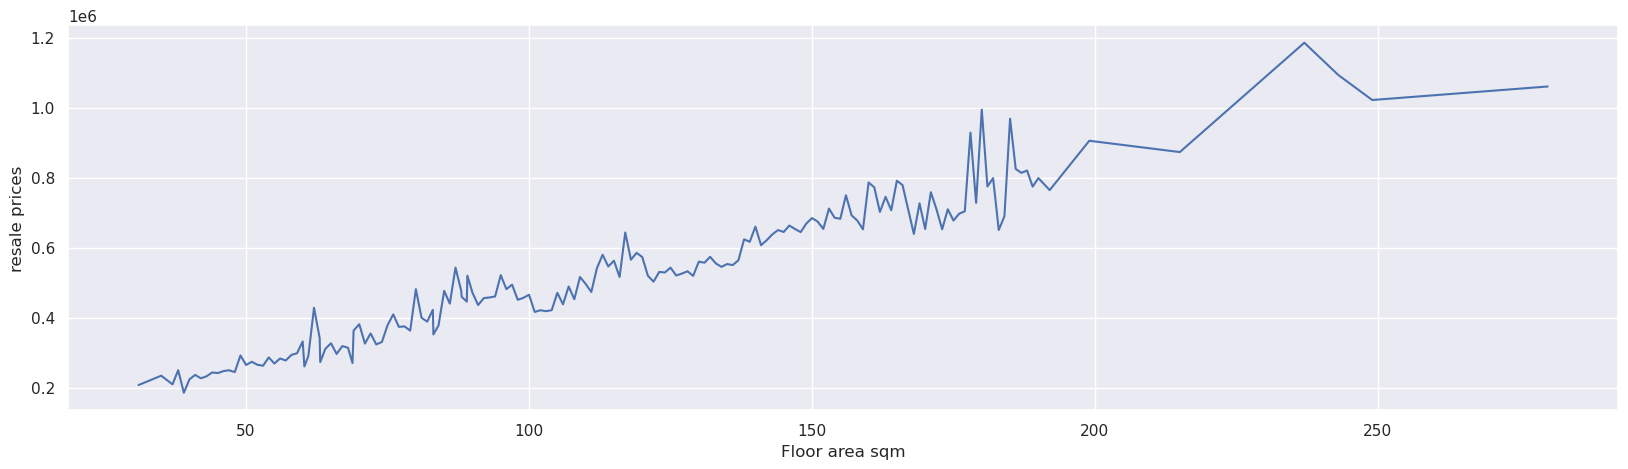

In [140]:
g2=sns.lineplot(data=HDB_df, x='floor_area_sqm', y='resale_price', errorbar=None)
g2.set(ylabel='resale prices', xlabel='Floor area sqm');

#### Flat model

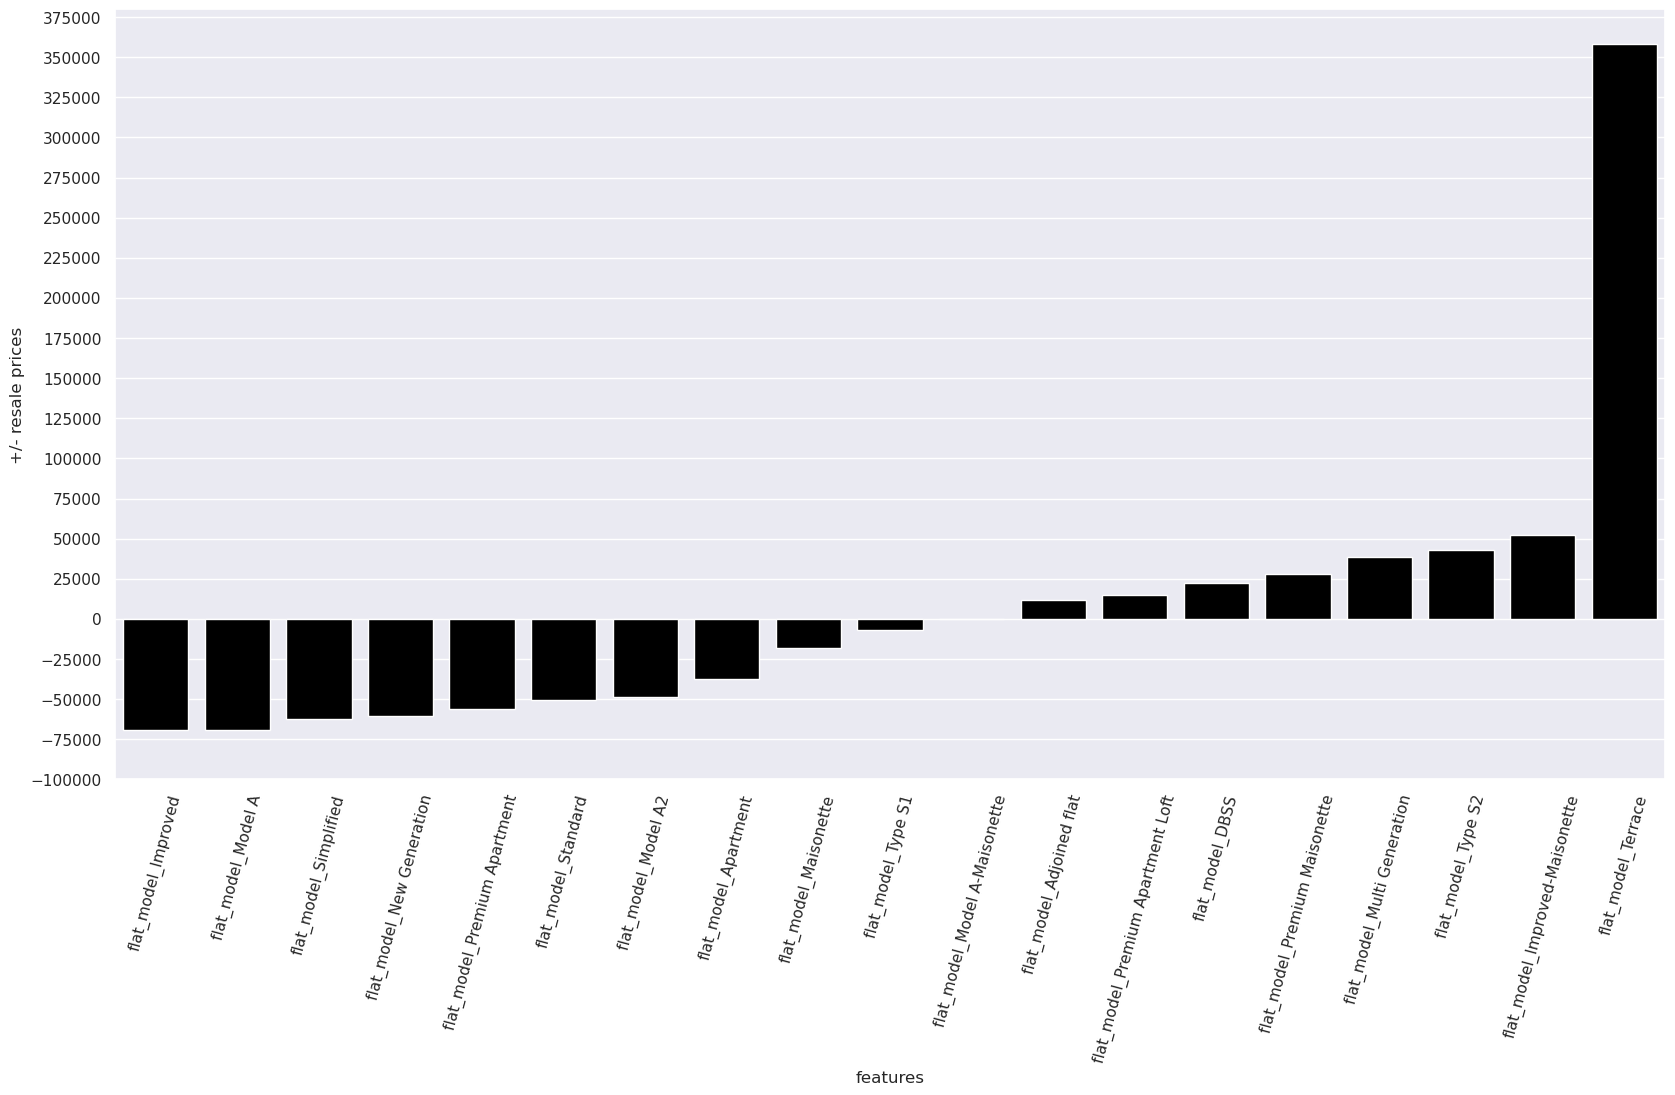

In [164]:
plot_df1=ridgeCV_df.loc[ridgeCV_df.index.str.startswith('flat_model')].sort_values(by='coef_val')
sns.set(rc={'figure.figsize': (20,10)})
g=sns.barplot(data=plot_df1,x=plot_df1.index,y='coef_val', color='black')
g.set_xticklabels(g.get_xticklabels(),rotation=75)
g.set(ylabel='+/- resale prices')
g.set_ylim(-100000, None)
ytick_vals = list(range(-100000,400000,25000))
g.set_yticks(ytick_vals);

Despite "flat_model" mean coefficient value is clearly exaggerated by exceptionally high values for Terrace model types (greater than 300% for each type) and the other models are lieing within the range of +50,000 to - 75,000. Thus it still does have impactful variations to resale price.

#### Flat type

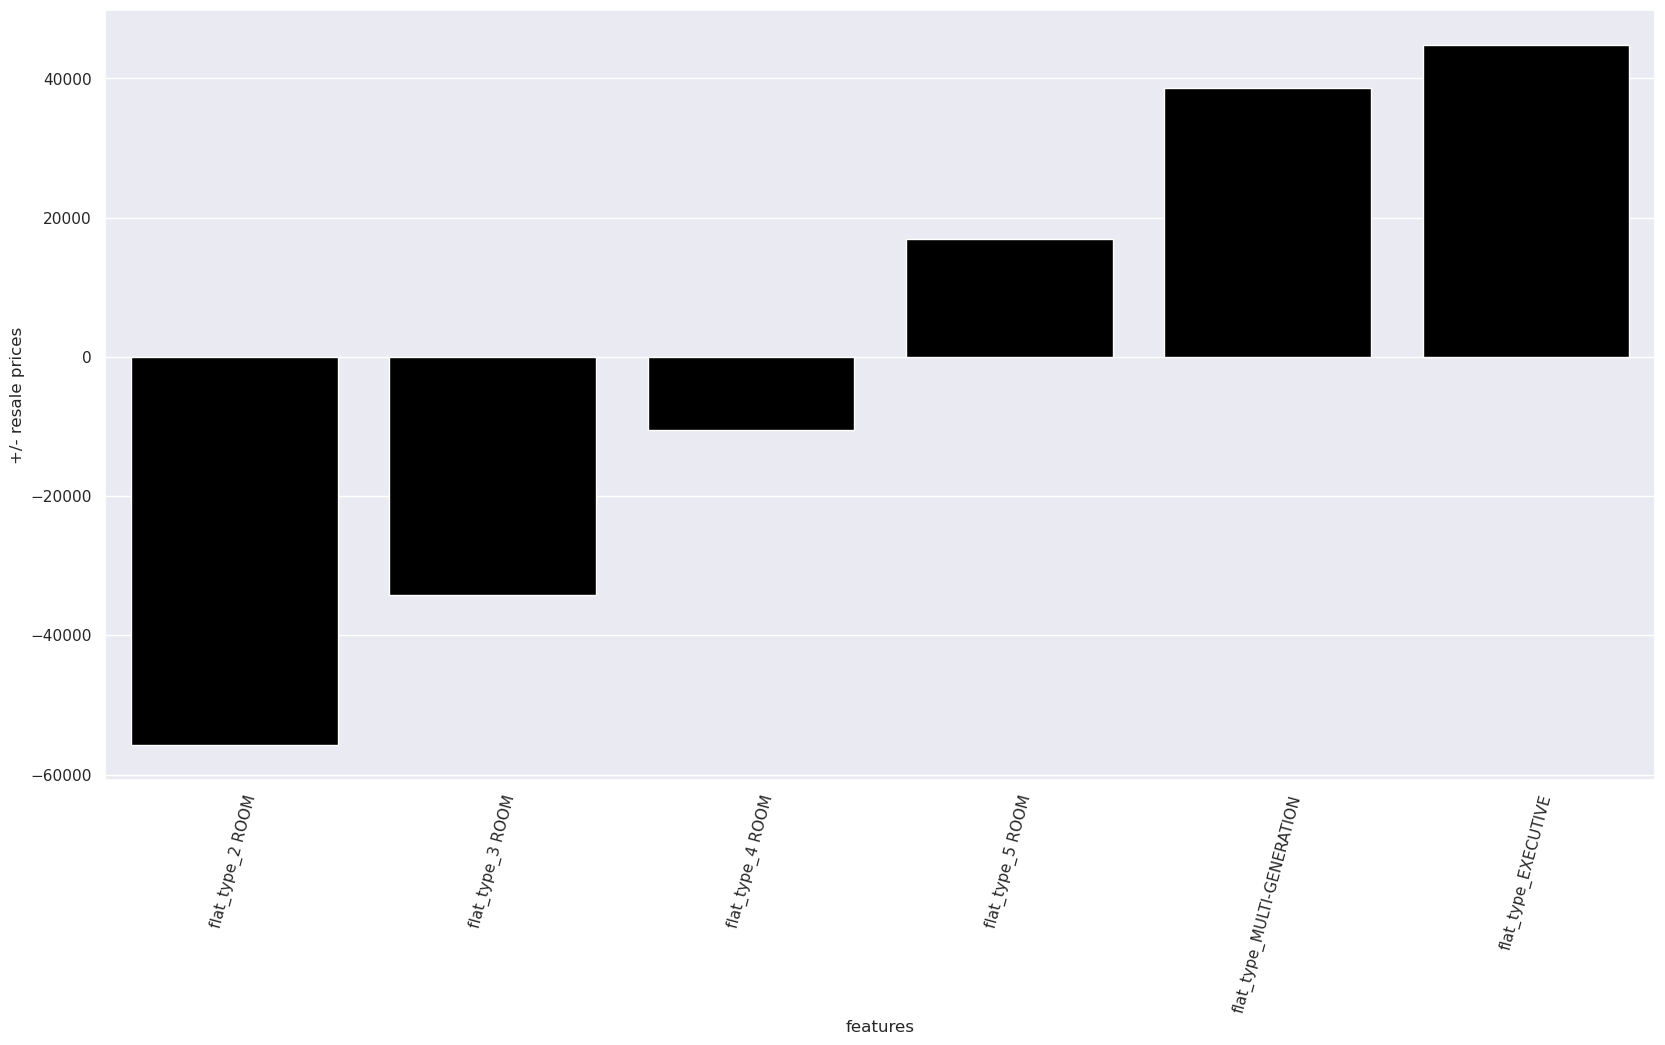

In [167]:
plot_df2=ridgeCV_df.loc[ridgeCV_df.index.str.startswith('flat_type')].sort_values(by='coef_val')
sns.set(rc={'figure.figsize': (20,10)})
g2=sns.barplot(data=plot_df2,x=plot_df2.index,y='coef_val', color='black')
g2.set_xticklabels(g2.get_xticklabels(),rotation=75)
g2.set(ylabel='+/- resale prices');

Conclusion:
- Top 5 features are: 
    - **floor_area_sqm**: capturing size of flat
    - **flat_model**: HDB model capturing structure of flat layout
    - **multistorey_carpark**: Availability of multi carpark in the same block
    - **lb_storey**: Lower bound of range of storey that the resale flat is sold captures preference of storey in purchase of resale flat
    - **flat_type**: Amount of rooms in the resale flat captures preferences of numbers of room
    
    
- Bottom 5 features are: 
    - **other_room_rental**: captures the proportion of other room type rental units in the resale flat block in affecting resale price
    - **multigen_sold**: captures the proportion of multi-gen units in the resale flat block in affecting resale price
    - **3room_rental**: captures the proportion of 3 room rental units in the resale flat block in affecting resale price
    - **bus_stop_nearest_distance**: captures importance of bus as public transport in resale price
    - **studio_apartment_sold**: captures the proportion of studio apartment residential units in the resale flat block in affecting resale price
    

- HDB can consider features that are significant/impactful, in their policies to keep resale flat prices low and have a gauge on how certain features contribute to resale flat prices
    - Location of resale flat matters as 3 geographical features ("town", "planning_area", "street_name") are in the top 10 impactful features
    - Certain facilities matters such as multistorey carpark availiability whereas for bus transport might not have much impact
   

## Future works

- Areas for further improvement
    - Use of other technical tools to improve model performance as conluded that multicollinearity still persists. Tools such as:
      - Principal Component Analysis (PCA) to reduce dimensionality of features through capturing important information from the initial set of features. 
      
      - Neural Network to take into account of non-linear relationship between features and resale prices which Linear Regression do not consider.  
            
    - Further data collection on potential significant features to improve prediction of model:
    
        - **Government policies**
        
        As analyse in the EDA, there is a decrease in resale prices from year 2013. In the same year, the Government introduced the Minimum Occupation Policy, such that Permanent Residents(PR) have to fulfill for at least 3 years of continuous residence before being eligible to purchase resale flats.
        
        - **Data on resale flat's substitutes**
        
        Other information such as the supply of BTO flats, pricing of other accomodation types (eg. Condominiums, Bungalows) have an influence on the demand for resale flats thus will also influence its price.
        
        - **Financial & Demograhpic information on Singaporeans**
        
        Information on income, saving levels affect the purchasing power of resale flats thus affecting its demand as well. Simiarly, with demographic information, possible relation between demand of resale flats and age groups can be drawn.
        
  - Furter continue work on features. For example, geographical features display significant and impactful relation to resale flat prices, further analysis on which specific locations and investigating into underlying reasons for its relation might open up new features or existing features that can impact resale prices.
        
        

# Submission to kaggle

In [207]:
#Importing test data set
sub_test_kaggle=pd.read_csv('/kaggle/input/test-kaggle/test.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [208]:
#Drop of columns
columns_dropped=['Tranc_YearMonth', 'storey_range','full_flat_type', 'residential', 'mid','floor_area_sqft', 'address', 'postal', 'mrt_latitude', 'mrt_longitude', 'bus_stop_name', 'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_latitude', 'pri_sch_longitude', 'cutoff_point', 'affiliation', 'sec_sch_latitude', 'sec_sch_longitude']
sub_test=sub_test_kaggle.drop(columns=columns_dropped)

In [209]:
#Dealing with null values
facilities_count_col_list=list(sub_test.columns[sub_test.isnull().any()])[1:]
sub_test[facilities_count_col_list]=sub_test[facilities_count_col_list].fillna(0)
sub_test.dropna(subset=['Mall_Nearest_Distance'],axis=0, inplace=True)
sub_test.reset_index(drop=True, inplace=True)

In [210]:
#Rename of columns
sub_test.rename(columns={'lower':'lb_storey'}, inplace=True)
sub_test.rename(columns={'upper':'ub_storey'}, inplace=True)
sub_test.rename(columns={'lease_commence_date':'lease_commence_year'}, inplace=True)

In [211]:
#Get ID
sub_id=sub_test[['id']]

In [197]:
#Preprocessing transform

#Standardscaling
sub_test_num=sub_test.select_dtypes(exclude='object')
sub_test_scaled=SS.transform(sub_test_num)

sub_test_SS_df=pd.DataFrame(sub_test_scaled, columns=sub_test_num.columns) 

#OneHotEncoding
sub_test_cat=sub_test.select_dtypes(include='object')
sub_test_cat_arr=OHE.transform(sub_test_cat).toarray()
sub_test_cat_df=pd.DataFrame(sub_test_cat_arr, columns=OHE.get_feature_names_out(sub_test_cat.columns))

#Merging
subtest_pro_df=pd.merge(sub_test_SS_df, sub_test_cat_df, left_index=True, right_index=True)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


In [ ]:
#Predicting
sub_predict=ridge_CV.predict(subtest_pro_df)

#Transforming predictions to dataframe
sub_predict_df=pd.DataFrame(sub_predict)

In [220]:
#Concat to ID
job_done_df=pd.concat([sub_id,sub_predict_df],axis=1)
job_done_df.rename(columns={'id':'Id', 0:'Predicted'}, inplace=True)

In [222]:
#Exporting prediction
job_done_df.to_csv('submission.csv', index=False)

In [228]:
job_done_df.shape

(16653, 2)